In [123]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import wordcloud
%matplotlib inline

In [19]:
pwd

'C:\\Users\\Dishant bhatt\\AppData\\Local\\Programs\\Python\\Python37\\Scripts'

In [126]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
g_cols = ['Genre', 'Value']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

In [129]:
users=pd.read_csv(r'C:\Users\Dishant bhatt\Desktop\Dishant Bhatt\Programs\Movie-Lens---PM-Project\ml-100k\u.user',sep='|',names=u_cols,encoding="ISO-8859-1")
ratings = pd.read_csv(r'C:\Users\Dishant bhatt\Desktop\Dishant Bhatt\Programs\Movie-Lens---PM-Project\ml-100k\u.data',sep='\t', names=r_cols,encoding="ISO-8859-1")
movies = pd.read_csv(r'C:\Users\Dishant bhatt\Desktop\Dishant Bhatt\Programs\Movie-Lens---PM-Project\ml-100k\u.item', sep='|', names=m_cols, usecols=range(5),encoding="ISO-8859-1")

genre = pd.read_csv(r'C:\Users\Dishant bhatt\Desktop\Dishant Bhatt\Programs\Movie-Lens---PM-Project\ml-100k\u.genre', sep='|', names=g_cols,encoding="ISO-8859-1")


In [64]:
movielens=pd.merge(users,ratings)
movielens=pd.merge(movielens,movies)
movielens.head(3)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


In [65]:
movielens.describe()
movielens.shape

(100000, 12)

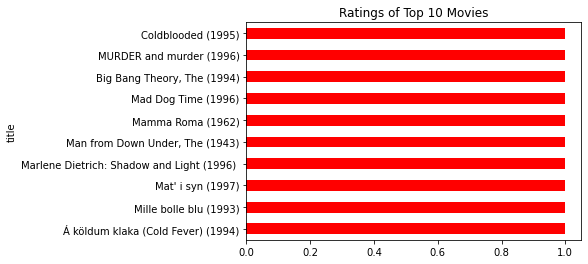

In [102]:
most_rated=movielens.groupby('title').size().sort_values(ascending=True)[:10]
most_rated.plot(kind="barh",title="Ratings of Top 10 Movies",label="count",color="Red")

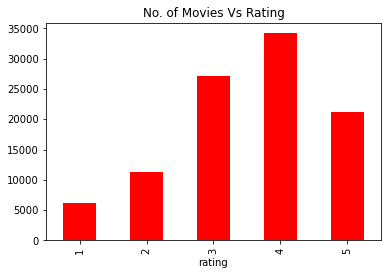

In [104]:
most_rated=movielens.groupby('rating').size()
most_rated.plot(kind="bar",title="No. of Movies Vs Rating",label="count",color="Red")

In [86]:
movie_stat = movielens.groupby('title').agg({'rating':[np.size,np.mean]})
movie_stat.sort_values([('rating','mean')],ascending=False).head()


rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

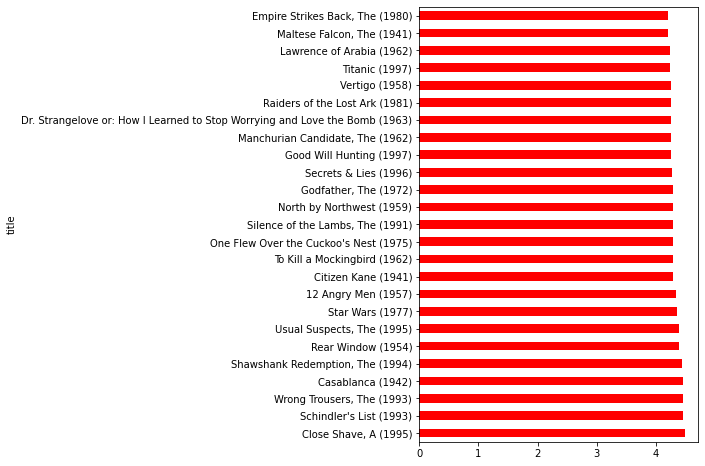

In [119]:
most100=movie_stat['rating']['size'] >= 100
most_rated_mean=movie_stat[most100].sort_values([('rating', 'mean')], ascending=False)
most_rated_mean['rating']['mean'].sort_values(ascending=False)[:25].plot(kind="barh",color="red",figsize=(5,8))

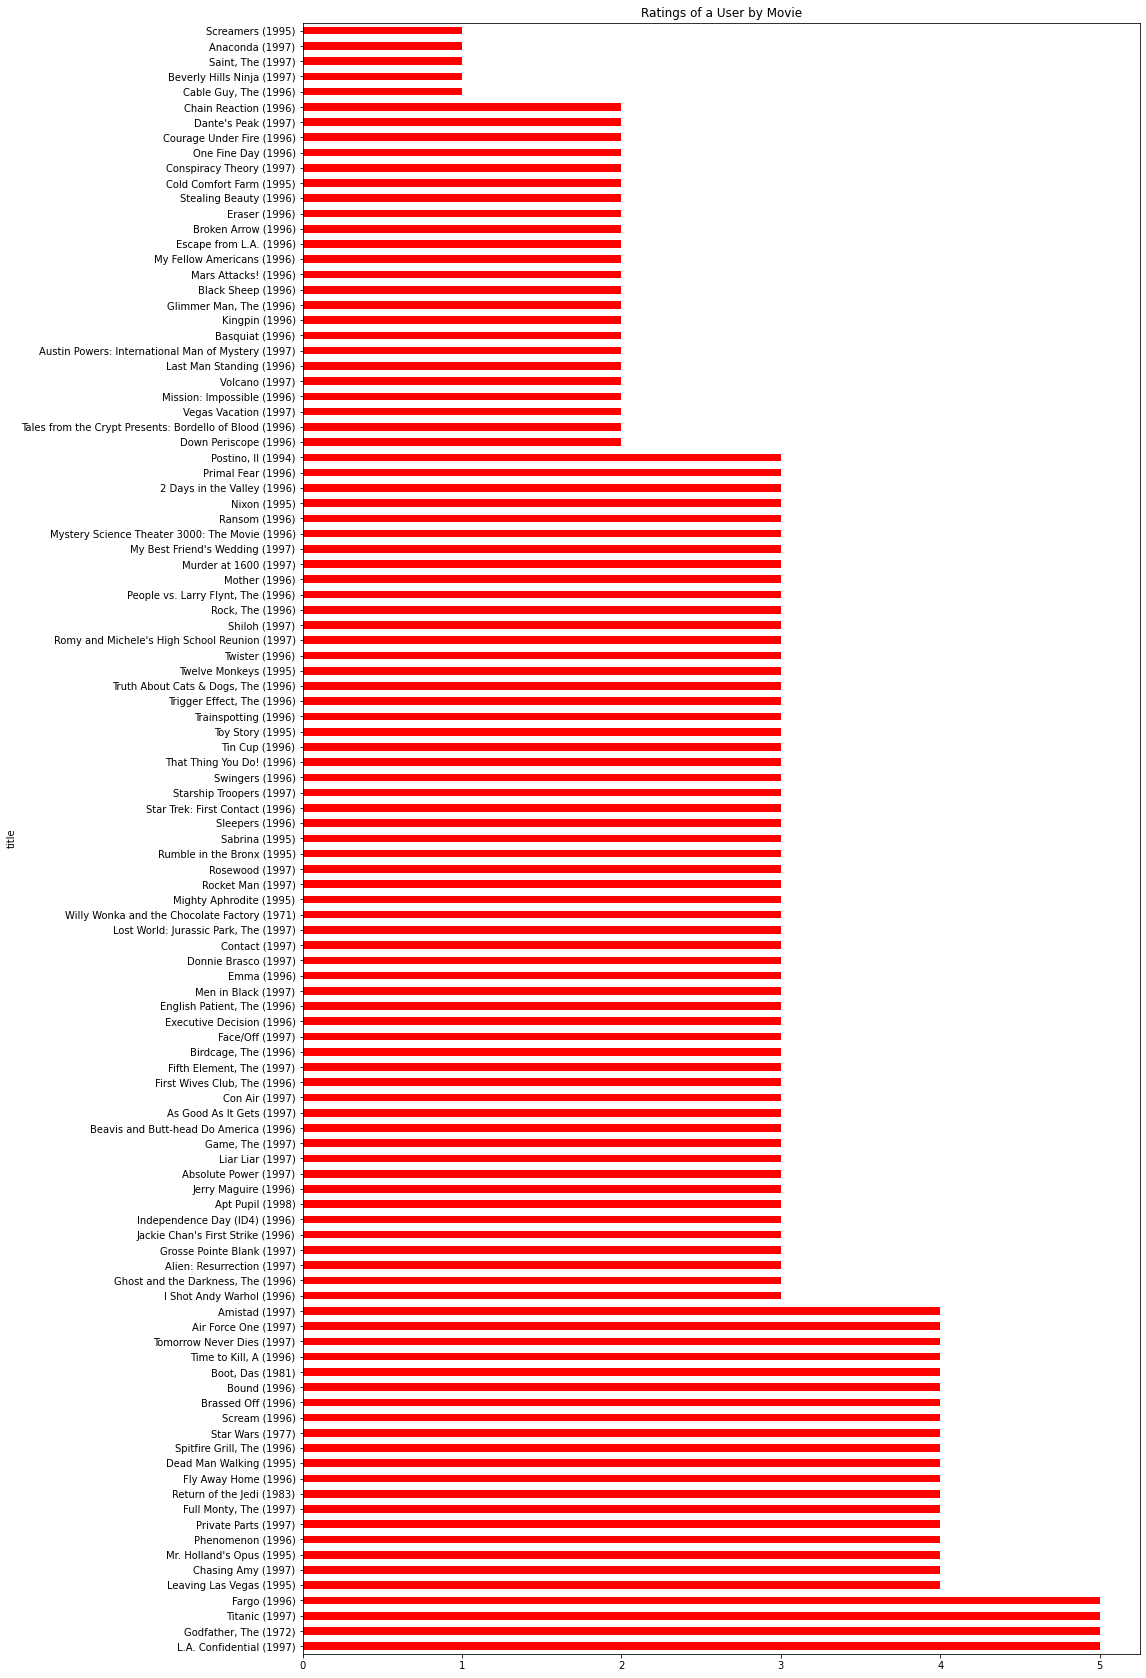

In [120]:
user1=movielens[movielens.user_id==26]
user1=user1.groupby('title').agg([np.size,np.mean])
user1['rating']['mean'].sort_values(ascending=False).plot(kind="barh",color = "RED",figsize=(15,30),title="Ratings of a User by Movie",label="Movie Name")


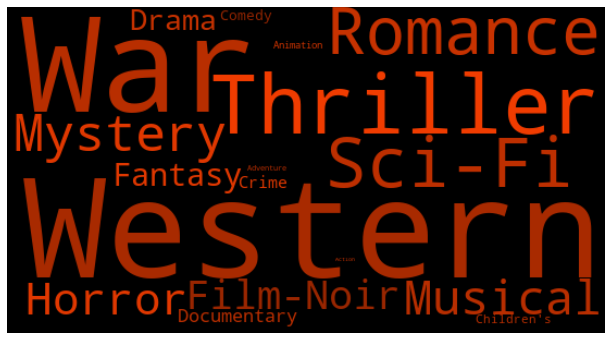

In [153]:
t = [["Action",1],
["Adventure",2],
["Animation",3],
["Children's",4],
["Comedy",5],
["Crime",6],
["Documentary",7],
["Drama",8],
["Fantasy",9],
["Film-Noir",10],
["Horror",11],
["Musical",12],
["Mystery",13],
["Romance",14],
["Sci-Fi",15],
["Thriller",16],
["War",17],
["Western",18]
]
words = dict()
for s in t:
    words[s[0]] = s[1]
tone =  11# define the color of the words
f, ax = plt.subplots(figsize=(14, 6))


wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

,Value
count,19.000000
mean,9.000000
std,5.627314
min,0.000000
25%,4.500000
50%,9.000000
75%,13.500000
max,18.000000
